In [1]:
import numpy as np
from numpy import tanh
import matplotlib.pyplot as plt 

In [9]:
#definition of all coefficients 
def sech(x):
    return 1/np.cosh(x)
def csch(x):
    return 1/np.sinh(x)

def Na(a,g,eps1):#check
    return (sech(g/2)-tanh(g/2)*sech(g/2)**3)/(a) +eps1
def Nb(a,g,eps2):#check
    return (sech(g/2)+tanh(g/2)*sech(g/2)**3)/(a) +eps2
def Jab(a,g):#check
    return (3*tanh(g/2)**(2)*sech(g/2)**(2)+sech(g/2)**(4))/(2*a)
def Jba(a,g):#check
    return (sech(g/2)**(4))/(2*a)
def Jaa(a,g):#check
    return (tanh(g/2)*sech(g/2)**(3))/(2*a)
def Jabl(a,g,d):#check
    return -(tanh(g/2)**(2)*sech(g/2)**(2))/(2*a)+d
def Sab(g):#check
    return sech(g/2)/2
def Sba(g):#check
    return (sech(g/2)**(3))/(2)
def Saa(g):#check
    return (tanh(g/2)*sech(g/2)**(2))/(2)
def Sabl(g):#check
    return -(tanh(g/2)**(2)*sech(g/2))/(2)

def MajBasis(n,a,g,eps1,eps2,d):
    rotator=np.kron((1/np.sqrt(2))*np.array([[1,1j],[1,-1j]]),np.eye(n))
    return rotator@HBdG(n,a,g,eps1,eps2,d)@rotator.conj().T

In [3]:
print(Na(a,g,eps1),Nb(a,g,eps2),Jab(a,g),Jba(a,g),Jaa(a,g),Jabl(a,g,d),Sab(g),Sba(g),Saa(g),Sabl(g))

NameError: name 'a' is not defined

In [6]:
#general size HBdG, C checked, S checked 

def HBdG(n,a,g,eps1,eps2,d):

    C = np.zeros((n,n))
    S = np.zeros((n,n),dtype=complex)

    for j in range(n//2):
        C[2*j,2*j]=-Na(a,g,eps1)
        C[2*j+1,2*j+1]=-Nb(a,g,eps2)
        C[2*j,2*j+1]=Jab(a,g)
        C[2*j+1,2*j]=Jab(a,g)

        S[2*j,2*j+1]= 1j*Sab(g)
        S[2*j+1,2*j]= -1j*Sab(g)
        
    for j in range(n//2 -1):

        C[2*j+1,2*j+2]=Jba(a,g)
        C[2*j+2,2*j+1]=Jba(a,g)
        S[2*j+1,2*j+2]= 1j*Sba(g)
        S[2*j+2,2*j+1]= -1j*Sba(g)

        C[2*j,2*j+2]=Jaa(a,g)
        C[2*j+2,2*j]=Jaa(a,g)
        S[2*j,2*j+2]=1j*Saa(g)
        S[2*j+2,2*j]=-1j*Saa(g)

        C[2*j+1,2*j+3]=-Jaa(a,g)
        C[2*j+3,2*j+1]=-Jaa(a,g)
        S[2*j+1,2*j+3]=-1j*Saa(g)
        S[2*j+3,2*j+1]=1j*Saa(g)

        C[2*j,2*j+3]=Jabl(a,g,d)
        C[2*j+3,2*j]=Jabl(a,g,d)

        S[2*j,2*j+3]=Sabl(g)
        S[2*j+3,2*j]=-Sabl(g)

    # Compute the conjugate transpose of S
    S_conj_T = np.conj(S).T
    # Create the block matrix using numpy.block
    top_left_block = np.block([[C, S]])
    bottom_left_block = np.block([[S_conj_T,-C]])
    # Combine the blocks vertically to form the final matrix
    return np.block([[top_left_block], [bottom_left_block]])

In [7]:
a,g,eps1,eps2,d=1,1,0,0,0
Ctest = np.array([[-Na(a,g,eps1),Jab(a,g),Jaa(a,g),Jabl(a,g,d),0,0],
                [Jab(a,g),-Nb(a,g,eps2),Jba(a,g),-Jaa(a,g),0,0],
                [Jaa(a,g),Jba(a,g),-Na(a,g,eps1),Jab(a,g),Jaa(a,g),Jabl(a,g,d)],
                [Jabl(a,g,d),-Jaa(a,g),Jab(a,g),-Nb(a,g,eps2),Jba(a,g),-Jaa(a,g)],
                [0,0,Jaa(a,g),Jba(a,g),-Na(a,g,eps1),Jab(a,g)],
                [0,0,Jabl(a,g,d),-Jaa(a,g),Jab(a,g),-Nb(a,g,eps2)]])
Stest = np.array([[0,1j*Sab(g),1j*Saa(g),Sabl(g),0,0],
                  
                [-1j*Sab(g),0,1j*Sba(g),-1j*Saa(g),0,0],

                [-1j*Saa(g),-1j*Sba(g),0,1j*Sab(g),1j*Saa(g),Sabl(g)],
                
                [-Sabl(g),1j*Saa(g),-1j*Sab(g),0,1j*Sba(g),-1j*Saa(g)],
                [0,0,-1j*Saa(g),-1j*Sba(g),0,1j*Sab(g)],
                [0,0,-Sabl(g),1j*Saa(g),-1j*Sab(g),0]])
HBdG(6,1,1,0,0,0)-Stest

ValueError: operands could not be broadcast together with shapes (12,12) (6,6) 

In [ ]:
def HBdG6(a,g,eps1,eps2,d):
    C = np.array([[-Na(a,g,eps1),Jab(a,g),Jaa(a,g),Jabl(a,g,d),0,0],
                [Jab(a,g),-Nb(a,g,eps2),Jba(a,g),-Jaa(a,g),0,0],
                [Jaa(a,g),Jba(a,g),-Na(a,g,eps1),Jab(a,g),Jaa(a,g),Jabl(a,g,d)],
                [Jabl(a,g,d),-Jaa(a,g),Jab(a,g),-Nb(a,g,eps2),Jba(a,g),-Jaa(a,g)],
                [0,0,Jaa(a,g),Jba(a,g),-Na(a,g,eps1),Jab(a,g)],
                [0,0,Jabl(a,g,d),-Jaa(a,g),Jab(a,g),-Nb(a,g,eps2)]])

    S = np.array([[0,1j*Sab(g),1j*Saa(g),Sabl(g),0,0],
                [-1j*Sab(g),0,1j*Sba(g),-1j*Saa(g),0,0],
                [-1j*Saa(g),-1j*Sba(g),0,1j*Sab(g),1j*Saa(g),Sabl(g)],
                [-Sabl(g),1j*Saa(g),-1j*Sab(g),0,1j*Sba(g),-1j*Saa(g)],
                [0,0,-1j*Saa(g),-1j*Sba(g),0,1j*Sab(g)],
                [0,0,-Sabl(g),1j*Saa(g),-1j*Sab(g),0]])

    # Compute the conjugate transpose of S
    S_conj_T = np.conj(S).T
    # Create the block matrix using numpy.block
    top_left_block = np.block([[C, S]])
    bottom_left_block = np.block([[S_conj_T,-C]])
    # Combine the blocks vertically to form the final matrix
    return np.block([[top_left_block], [bottom_left_block]])

In [11]:
n=200
X=[[0,1],[1,0]]
C1=np.kron(X,np.eye(n))
np.allclose(C1@HBdG(n,a,g,eps1,eps2,d).conj()@C1,-HBdG(n,a,g,eps1,eps2,d))

True

Text(0.5, 1.0, 'BdG_Real_Space_Spectrum_L=500_a=5_g=1_eps1=0_eps2=0')

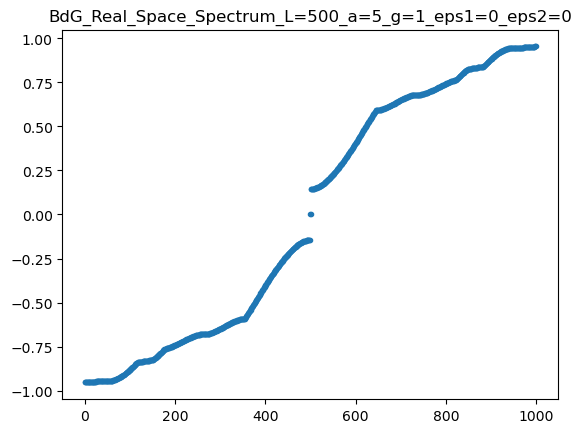

In [14]:
a,g=5,1
d,eps1,eps2=0.2,0,0
n=500
eigvals,eigvecs=np.linalg.eigh(MajBasis(n,a,g,eps1,eps2,d))
order=np.argsort(eigvals)
eigvals=eigvals[order]
eigvecs=eigvecs[order]
tol = 0.00001 # Define a tolerance level
zero_indices = np.where(np.abs(eigvals) < tol)[0]
zero_indices
zero = eigvecs[:, zero_indices]
sites=[j for j in range(len(eigvecs))]
plt.plot([j for j in range(len(eigvals))],eigvals,'.')
plt.title('BdG_Real_Space_Spectrum_L='+str(n)+'_a='+str(a)+'_g='+str(g)+'_eps1='+str(eps1)+'_eps2='+str(eps2))

/home/alberto/anaconda3/envs/qusim2/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alberto/anaconda3/envs/qusim2/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'BdG_Real_Space_Spectrum_L=500_a=5_g=1_eps1=0_eps2=0')

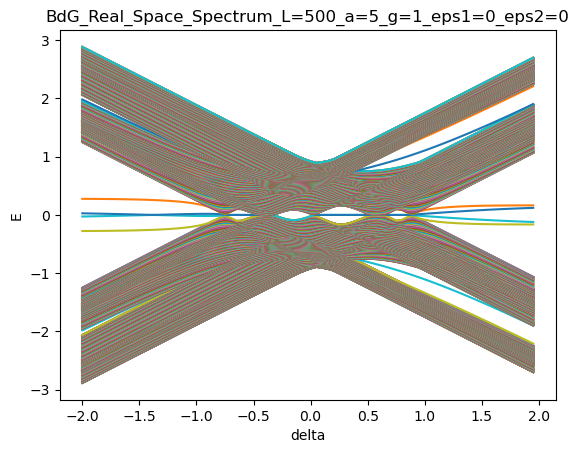

In [15]:
#Compute spectrum 
n=500
delta_range = np.arange(-2,2,0.05)
spectrum=np.zeros((len(delta_range),2*n),dtype=complex)
for i,delta in enumerate(delta_range):
    spectrum[i],_=np.linalg.eigh(MajBasis(n,a,g,eps1,eps2,delta))
plt.plot(delta_range,spectrum)
plt.xlabel('delta')
plt.ylabel('E')
plt.title('BdG_Real_Space_Spectrum_L='+str(n)+'_a='+str(a)+'_g='+str(g)+'_eps1='+str(eps1)+'_eps2='+str(eps2))

In [ ]:
n=30
a,g=5,3
X = np.linspace(-1, 1, 30)
Y = np.linspace(-1, 1, 30)
Ev=np.zeros((len(X),len(Y),2*n))
for i,d in enumerate(X):
    for j,eps in enumerate(Y):
        Ev[i,j],_=np.linalg.eigh(MajBasis(n,a,g,eps,eps,d))


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (900, 900) and arg 2 with shape (30, 30).

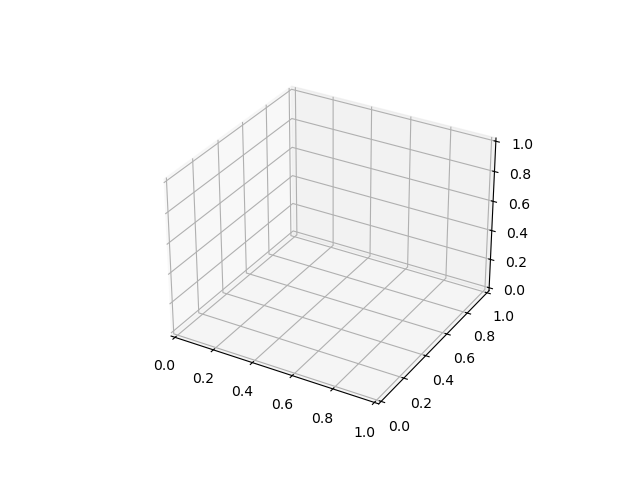

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from mpl_toolkits import mplot3d
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
x = j
y = j
x,y = np.meshgrid(x,y)
X, Y = np.meshgrid(X, Y, indexing='ij')
#for i, X in enumerate(X):
#    for j, Y in enumerate(Y):
#        Z[i,j] = Ev[i,,2]


for i in range(2*n):
    Z = Ev[:,:,i]
    ax.plot_surface(X, Y, Z)

plt.xlabel(r'$\delta$') 
plt.ylabel(r'$\epsilon$')
ax.set_zlabel('E')

   

          

In [ ]:
import matplotlib.projections
matplotlib.projections.get_projection_names()

['3d', 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']

Text(0.5, 1.0, 'BdG_Real_Space_MZM_L=500_a=5_g=1_d=0.2_eps1=0_eps2=0')

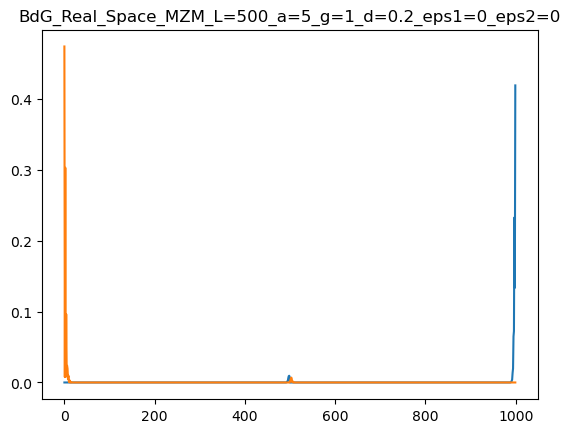

In [24]:
zeromode1=zero[:,0]
norm1 = np.linalg.norm(zeromode1)
#zeromode1=zeromode1/np.sqrt(norm1)

zeromode2=zero[:,1]
norm2 = np.linalg.norm(zeromode2)
#zeromode2=zeromode2/np.sqrt(norm2)

plt.plot(sites,np.abs(zeromode1)**2,'-')
plt.plot(sites,np.abs(zeromode2)**2,'-')
plt.title('BdG_Real_Space_MZM_L='+str(n)+'_a='+str(a)+'_g='+str(g)+'_d='+str(d)+'_eps1='+str(eps1)+'_eps2='+str(eps2))

In [23]:
np.sqrt(norm1)

1.0

In [22]:
zeromode1.conj().T@zeromode1

(1+0j)